In [19]:
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

1. scale space extrema detection
2. keypoint localization
3. orientation assignement
4. keypoint descriptor
5. keypoint matching

1. scale space extrema detection
   - tiene in considerazione i vari livelli della piramide gaussiana
2. keypoint localization
   - se un'intensità è minore di una certa soglia (0.03) li eliminiamo
   - eliminiamo gli edges usando gli autovalori e il loro ratio (10)
   - eliminiamo keypoints a basso contrasto e edge keypoints
3. orientation assignement
   - viene assegnato orientamento per ogni keypoin
   - viene reato l'orientation histogram. Consideriamo solo i picchi più alti e quelli maggiori dell'80% (in termini di magnitudo)
   -  si creano keupoint con la stessa location e scala ma diverse direzioni

Ogni keypoint ha dimensione 128 perchè consideriamo quadrati di tipo 1616, poichè abbiamo 4x4 bin. (0.8)

In [13]:
def generate_octave(init_level, s, sigma): 
    octave = [init_level] 
    k = 2**(1/s) 
    for _ in range(s+2): 
        next_level = ndimage.gaussian_filter(octave[-1],k * sigma)
        octave.append(next_level) 
    return octave

def generate_gaussian_pyramid(im, num_octave, s, sigma): 
    pyr = [] 
    for _ in range(num_octave): 
        octave = generate_octave(im, s, sigma) 
        pyr.append(octave) 
        im = octave[-3][::2, ::2] 
    return pyr

def plot_pyramid(p,sz,hspace=10,vspace=10):
    rows, cols = sz[0],sz[1]

    nrows = sum([x[0].shape[0] for x in p]) +  vspace*(num_octave-1)
    ncols = cols*(s+3)+hspace*(s+2)
    output_image = np.ones((nrows,ncols))

    r = 0
    for i in range(len(p)):
        c = 0
        for j in range(len(p[i])):
            w,h = p[i][j].shape
            output_image[r:r+w,c:c+h] = p[i][j]
            c += cols + hspace
        r += w + vspace
    
    return output_image

In [14]:
img = cv2.imread('imgs/haar.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
num_octave = 10
s = 2
sigma = 1

p = generate_gaussian_pyramid(img,num_octave,s,sigma)

output_pyr = plot_pyramid(p,img.shape)

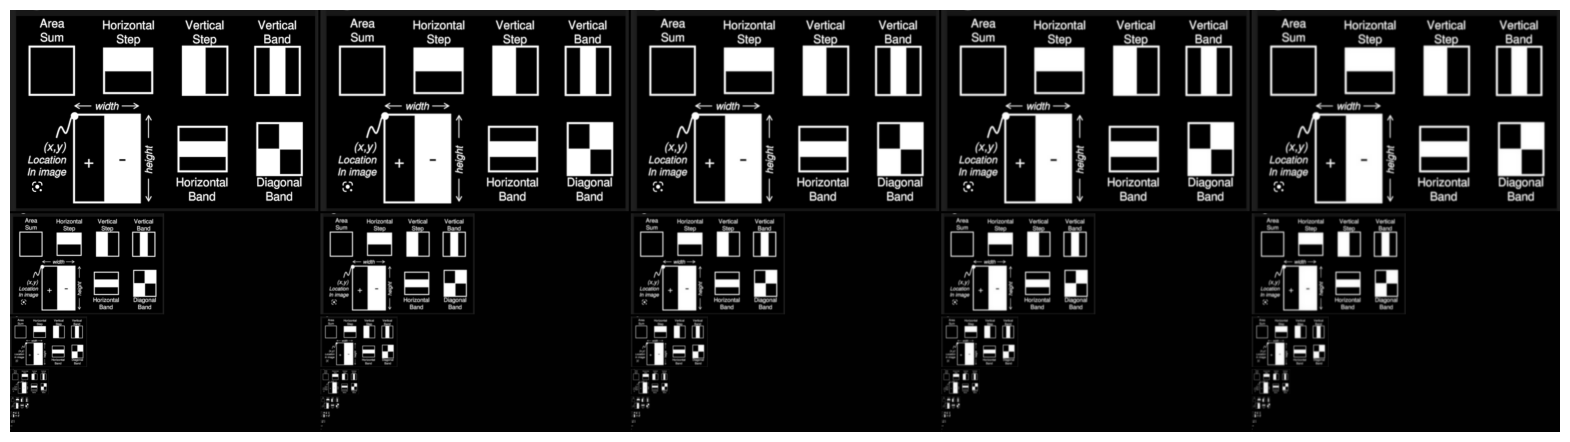

In [22]:
fig = plt.figure(figsize=(20, 20))

plt.imshow(output_pyr,cmap=cm.gray)
plt.axis('off')
plt.show()